In [20]:
import numpy as np
import pylab as pl
import matplotlib.gridspec as gridspec
from scipy.optimize import curve_fit
from scipy.integrate import trapz
import sympy as sy

In [21]:
# O modelo utilizado para ajustar a curva do pico de intensidade foi a função gaussiana.
# Vamos fazer o ajuste e, então, calcular a área desse pico de intensidade, que é o objetivo dessa análise.

def funcaoGaussiana(x, a, b, c):
    y = a * (np.e**(-1*((x - b)**2)/(2*(c**2))))
    return y

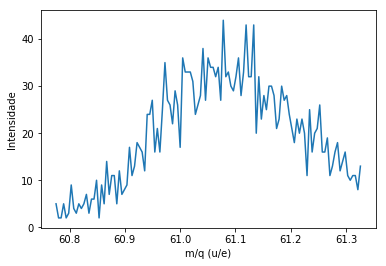

In [22]:
#Gráfico do pico de intesidade correspondente à razão massa/carga 61.  

x1, y1 = np.loadtxt ('pico61.txt', unpack = True)

pl.xlabel('m/q (u/e)')
pl.ylabel('Intensidade')
pl.plot(x1,y1)

In [23]:
#Com o uso do curve_fit, foram estimados os parâmetros que nos dariam o melhor ajuste.

parametros1, covariancia1 = curve_fit(funcaoGaussiana, x1, y1, p0 = [8,50, 15])
print(parametros1)

[33.20468281 61.09148101  0.14052654]


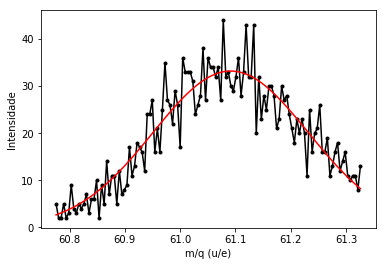

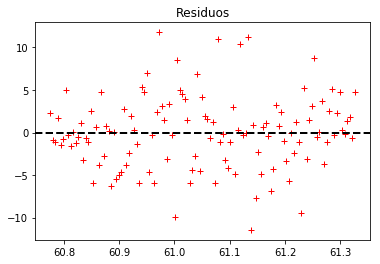

In [24]:
#Aqui temos a construção do gráfico com os pontos do pico de intensidade e o ajuste com a cruva gaussiana e também o gráfico com os resíduos do ajuste.

y_modelo1 = funcaoGaussiana(x1, parametros1[0], parametros1[1], parametros1[2]) 
#construção da curva gaussiana com os parâmetros gerados no curve_fit


pl.xlabel('m/q (u/e)')
pl.ylabel('Intensidade')
pl.plot(x1, y1, 'k.-')
pl.plot(x1, y_modelo1, 'r-')
pl.show()
#plot das curvas

pl.title('Residuos')
pl.plot(x1, y1 - y_modelo1, 'r+')
pl.axhline(0, color='k', ls='--', lw=2)
pl.show()
#plot dos resíduos

In [25]:
#Cálculo preliminar da área com a curva gaussiana.

areaPico61 = trapz (x1, y_modelo1)
areaPico61

332.33074687267873

[0.73886132 0.00366464 0.00404427]


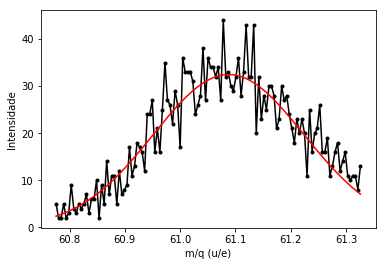

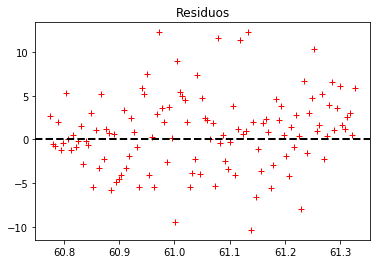

In [156]:
#Cálculo da incertezas dos parâmetros

incertezas = np.sqrt(np.diagonal(covariancia1))
print(incertezas)

y_modelo1 = funcaoGaussiana(x1, parametros1[0]-0.73886132, parametros1[1]-0.00366464, parametros1[2]-0.00404427) 
#plot do gráfico com as incertezas

pl.xlabel('m/q (u/e)')
pl.ylabel('Intensidade')
pl.plot(x1, y1, 'k.-')
pl.plot(x1, y_modelo1, 'r-')
pl.show()

pl.title('Residuos')
pl.plot(x1, y1 - y_modelo1, 'r+')
pl.axhline(0, color='k', ls='--', lw=2)
pl.show()

In [145]:
#Cálculo da soma dos resíduos quadrados

def somaResiduosQuadrados(data, modelo):
    return np.sum((data - modelo)**2)

print(somaResiduosQuadrados(data=y1, modelo=y_modelo1))

2305.073720621072


In [1]:
#Fazemos, então, o cálculo das variáveis necessárias para analisar o grau de confiança dos parâmetros que estamos usando

chi_2 = residuo_quadrado(data=y1, modelo=y_modelo1)/(np.std(y1 - y_modelo1)**2)
print(chi_2)
print(np.std(y1 - y_modelo1))

NameError: name 'residuo_quadrado' is not defined

In [137]:
parA, parB, parC = np.meshgrid(np.linspace(30, 36, 126), np.linspace(55, 65, 126), np.linspace(0.12, 0.16, 126))

chi2 = 9999999*np.ones(parA.shape)

for i in tqdm(range(parA.shape[0])):
    for j in range(parA.shape[1]):
        for k in range(parA.shape[2]):
            y_modelo = funcaoGaussiana(x1, a=parA[i, j, k], b=parB[i, j, k], c=parC[i, j, k])
            chi2[i, j, k] = residuo_quadrado(data=y1, modelo=y_modelo)/(4.284**2)

100%|████████████████████████████████████████████████████████████████████████████████| 126/126 [01:13<00:00,  1.80it/s]


In [138]:
#Identificando a posição do chi quadrado mínimo

print(chi2.min())
print(np.where(chi2 == chi2.min()))

129.88160610197122
(array([76], dtype=int32), array([68], dtype=int32), array([60], dtype=int32))


In [141]:
#Podemos ver que os valores encontrados estão compatíveis com os valores usados nos parâmetros.

print('parametro a =', parA[76, 68, 60])
print('parametro b =', parB[76, 68, 60])
print('parametro c =', parC[76, 68, 60])


parametro a = 33.264
parametro b = 61.08
parametro c = 0.1392


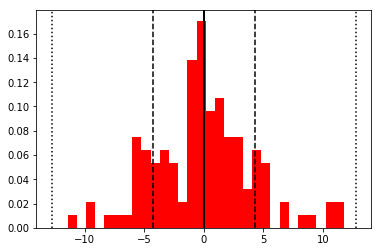

In [16]:
#Para melhorar o ajuste que queremso fazer, fazemos a eliminação dos outliers 


residuo = y1 - y_modelo1
std = np.std(residuo)
#calculando o desvio padrão do resíduo, temos um histograma onde podemos ver como os pontos se distanciam da medida central e quais pontos estão muito fora dos valores que queremos

pl.hist(residuo, bins=30, density=True, color='red')
pl.axvline(0, color='k', ls='-', lw=2)
pl.axvline(+1*std, color='k', ls='--')
pl.axvline(-1*std, color='k', ls='--')

pl.axvline(+3*std, color='k', ls=':')
pl.axvline(-3*std, color='k', ls=':')

pl.show()

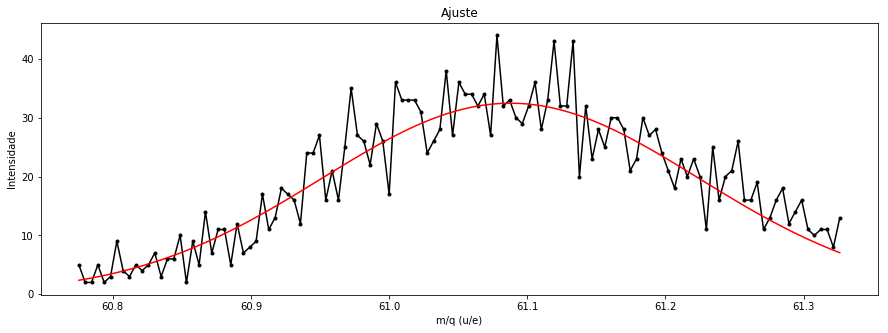

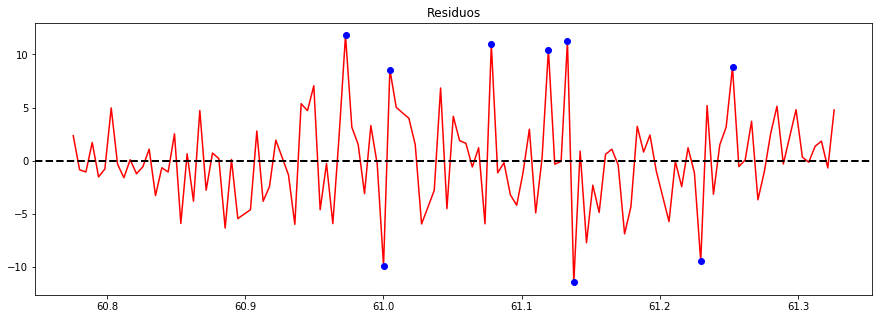

In [157]:
#Podemos, então, plotar o ajuste e os resíduos, de forma que destacamos os pontos que estão fora do intervalo que consideramos apropriado

pl.figure(figsize=[15,5])
pl.title('Ajuste')

pl.xlabel('m/q (u/e)')
pl.ylabel('Intensidade')
pl.plot(x1, y1, 'k.-')
pl.plot(x1, y_modelo1, 'r-')
pl.show()

pl.figure(figsize=[15,5])
pl.title('Residuos')
pl.plot(x1, residuo, 'r-')
pl.axhline(0, color='k', ls='--', lw=2)

mask = np.absolute(residuo) > 2*std
#intervalo escolhido - pontos destacados desse intervalo serão os outliers que iremos retirar 

pl.plot(x1[mask], residuo[mask], 'bo')

pl.show()

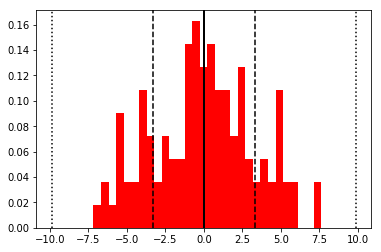

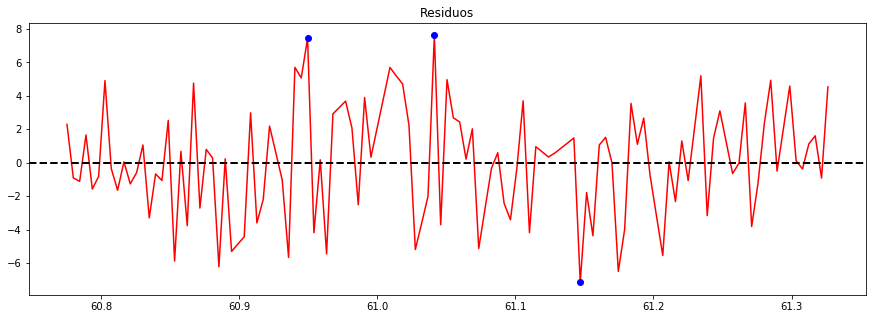

In [119]:
#Começamos a retirar os outliers, filtrando agora apenas os valores que se encaixaram no intervalo escolhido 

x1_new = x1[~mask]
y1_new = y1[~mask]
parametros1_new, covariancia1_new = curve_fit(funcaoGaussiana, x1_new, y1_new, p0 = [8,50, 15])
y_modelo1_new = funcaoGaussiana(x1_new, parametros1_new[0], parametros1_new[1], parametros1_new[2])
residuo_new = y1_new - y_modelo1_new
std_new = np.std(residuo_new)
mask_new = np.absolute(residuo_new) > 2*std_new


    
pl.hist(residuo_new, bins=30, density=True, color='red')
pl.axvline(0, color='k', ls='-', lw=2)
pl.axvline(+1*std_new, color='k', ls='--')
pl.axvline(-1*std_new, color='k', ls='--')

pl.axvline(+3*std_new, color='k', ls=':')
pl.axvline(-3*std_new, color='k', ls=':')

pl.show()
    
pl.figure(figsize=[15,5])
pl.title('Residuos')
pl.plot(x1_new, residuo_new, 'r-')
pl.axhline(0, color='k', ls='--', lw=2)
    
pl.plot(x1_new[mask_new], residuo_new[mask_new], 'bo')
pl.show()
            
    
    
    
    

    

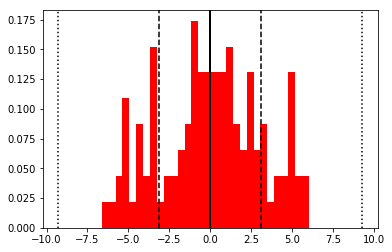

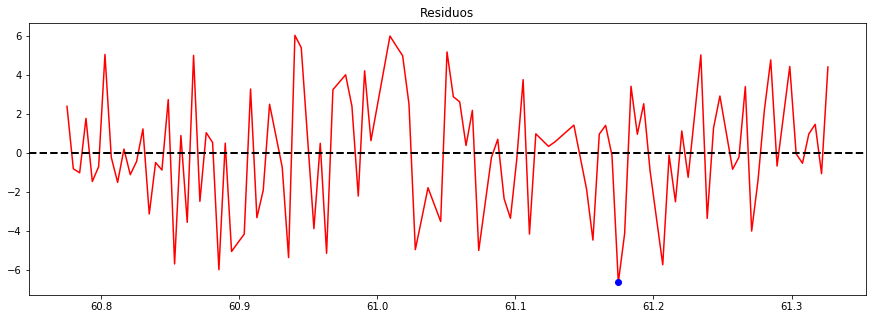

In [123]:
x1_new2 = x1_new[~mask_new]
y1_new2 = y1_new[~mask_new]
parametros1_new2, covariancia1_new2 = curve_fit(funcaoGaussiana, x1_new2, y1_new2, p0 = [8,50, 15])
y_modelo1_new2 = funcaoGaussiana(x1_new2, parametros1_new2[0], parametros1_new2[1], parametros1_new2[2])
residuo_new2 = y1_new2 - y_modelo1_new2
std_new2 = np.std(residuo_new2)
mask_new2 = np.absolute(residuo_new2) > 2*std_new2


    
pl.hist(residuo_new2, bins=30, density=True, color='red')
pl.axvline(0, color='k', ls='-', lw=2)
pl.axvline(+1*std_new2, color='k', ls='--')
pl.axvline(-1*std_new2, color='k', ls='--')

pl.axvline(+3*std_new2, color='k', ls=':')
pl.axvline(-3*std_new2, color='k', ls=':')

pl.show()
    
pl.figure(figsize=[15,5])
pl.title('Residuos')
pl.plot(x1_new2, residuo_new2, 'r-')
pl.axhline(0, color='k', ls='--', lw=2)
    
pl.plot(x1_new2[mask_new2], residuo_new2[mask_new2], 'bo')
pl.show()
           
        

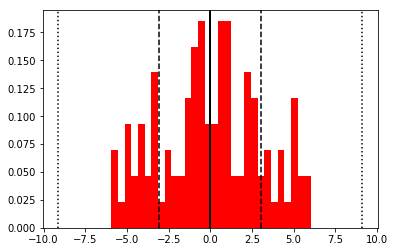

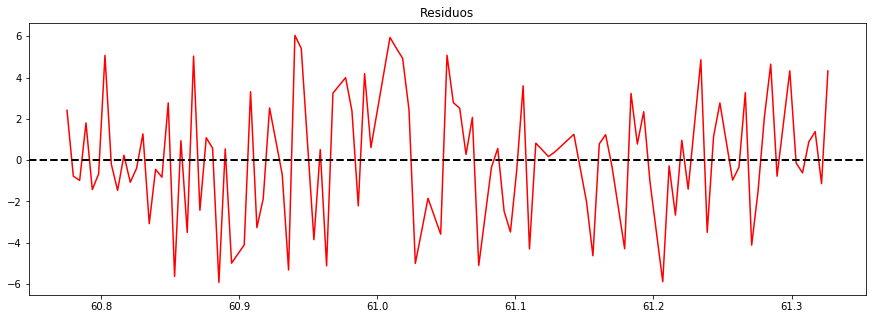

In [124]:
x1_new3 = x1_new2[~mask_new2]
y1_new3 = y1_new2[~mask_new2]
parametros1_new3, covariancia1_new3= curve_fit(funcaoGaussiana, x1_new3, y1_new3, p0 = [8,50, 15])
y_modelo1_new3 = funcaoGaussiana(x1_new3, parametros1_new3[0], parametros1_new3[1], parametros1_new3[2])
residuo_new3 = y1_new3 - y_modelo1_new3
std_new3 = np.std(residuo_new3)
mask_new3 = np.absolute(residuo_new3) > 2*std_new3


    
pl.hist(residuo_new3, bins=30, density=True, color='red')
pl.axvline(0, color='k', ls='-', lw=2)
pl.axvline(+1*std_new3, color='k', ls='--')
pl.axvline(-1*std_new3, color='k', ls='--')

pl.axvline(+3*std_new3, color='k', ls=':')
pl.axvline(-3*std_new3, color='k', ls=':')

pl.show()
    
pl.figure(figsize=[15,5])
pl.title('Residuos')
pl.plot(x1_new3, residuo_new3, 'r-')
pl.axhline(0, color='k', ls='--', lw=2)
    
pl.plot(x1_new3[mask_new3], residuo_new3[mask_new3], 'bo')
pl.show()
           

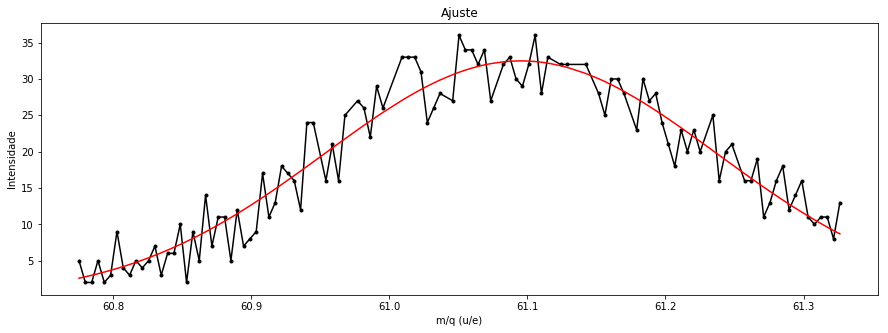

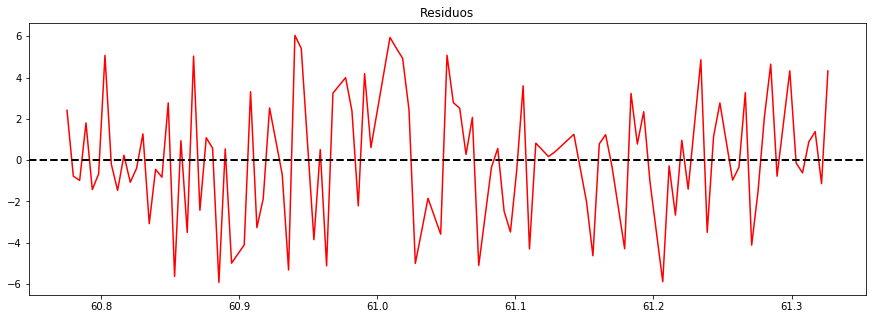

In [158]:
pl.figure(figsize=[15,5])
pl.title('Ajuste')
pl.xlabel('m/q (u/e)')
pl.ylabel('Intensidade')
pl.plot(x1_new3, y1_new3, 'k.-')
pl.plot(x1_new3, y_modelo1_new3, 'r-')
pl.show()

pl.figure(figsize=[15,5])
pl.title('Residuos')
pl.plot(x1_new3, residuo_new3, 'r-')
pl.axhline(0, color='k', ls='--', lw=2)

mask_new3 = np.absolute(residuo_new3) > 2*std_new3

pl.plot(x1_new3[mask_new3], residuo_new3[mask_new3], 'bo')

pl.show()


#Após algumas repetições, temos a eliminação de todos os outliers 

In [2]:
#Podemos ver significativamente como a retirada dos outliers impacta a nossa análise. 
#Fazendo o cálculo de área novamente, que é o que nos interessa aqui, percebemos uma alterção nesse valor.
# Isso mostra que esse procedimento pode melhorar os resultados que queremos obter.      

areaPico61 = trapz (x1_new3,y_modelo1_new3)
areaPico61

NameError: name 'trapz' is not defined